# Plot Scores for Columns of MSA

## Import and Clean Data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR42792\P04949_ortholog_msa_scores.data"

df = pd.read_csv(in_fh)

In [2]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes

261 columns used in analysis.



c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Identity                object
Percent Identity       float64
Avg Blosum62 Score     float64
Avg Frequency Score    float64
Fraction Aligned       float64
Fraction Disordered    float64
dtype: object

## Distributions of Each Score

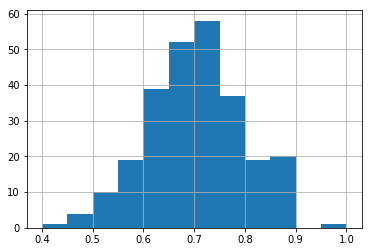

In [26]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

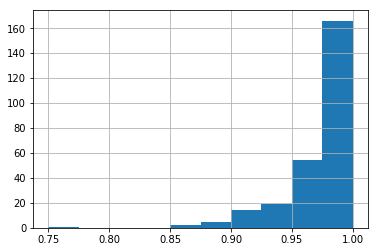

In [4]:
df_clean['Fraction Aligned'].hist();

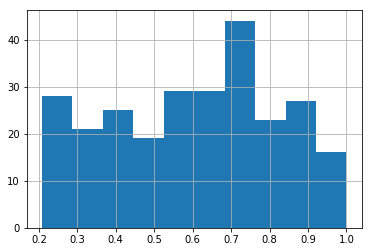

In [5]:
df_clean['Fraction Disordered'].hist();

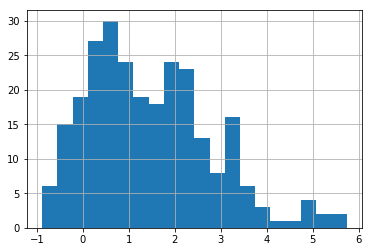

In [6]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

## Plot Column Scores

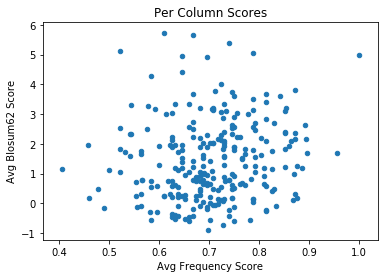

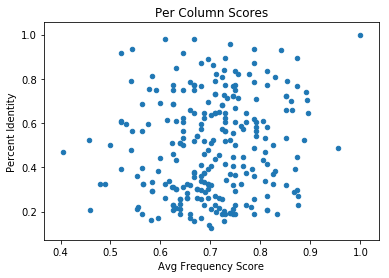

In [7]:
# matplotlib backend to plot dataframe
df_clean.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores');

Disorder Split at 50% for same scores above

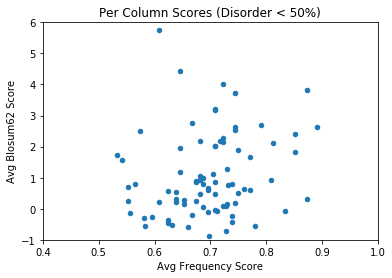

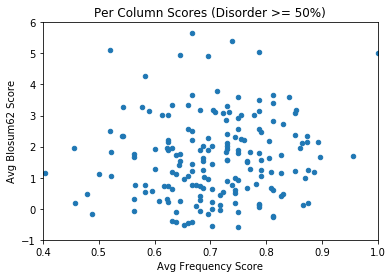

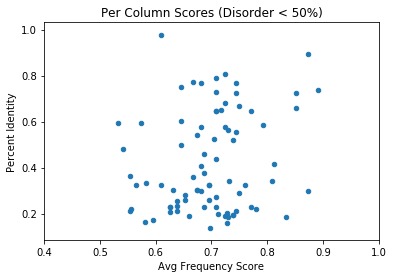

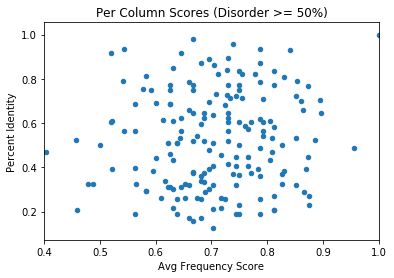

In [25]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

df_clean_dis1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.4, 1.0])
plt.ylim([-1, 6])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.4, 1.0])
plt.ylim([-1, 6])
df_clean_dis1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.4, 1.0])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.4, 1.0]);

Attempting to filter by fraction aligned produced no differences (maybe shrink size of window)

In [9]:
print(min(df_clean['Fraction Aligned']))

0.75


In [10]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [11]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [12]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
336,x,0.333333,-0.561905,0.583333,0.75,0.222222


In [13]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
0,M,1.000000,5.000000,1.000000,0.916667,1.000000
63,R,0.325581,-0.170543,0.488372,0.895833,1.000000
64,I,0.613636,3.010571,0.613636,0.916667,1.000000
65,N,0.755556,3.269697,0.577778,0.937500,0.977778
66,T,0.688889,1.932323,0.600000,0.937500,0.888889
67,N,0.977778,5.644444,0.666667,0.937500,0.844444
68,V,0.288889,1.023232,0.688889,0.937500,0.777778
69,S,0.326087,0.472464,0.478261,0.958333,0.760870
70,A,0.521739,1.957488,0.456522,0.958333,0.760870
71,L,0.434783,1.631884,0.804348,0.958333,0.760870


## Distribution of Each Score Split at 50% Disorder

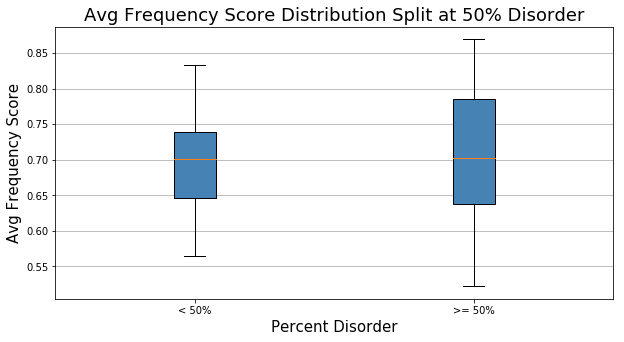

In [14]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split at 50% Disorder', fontsize=18);


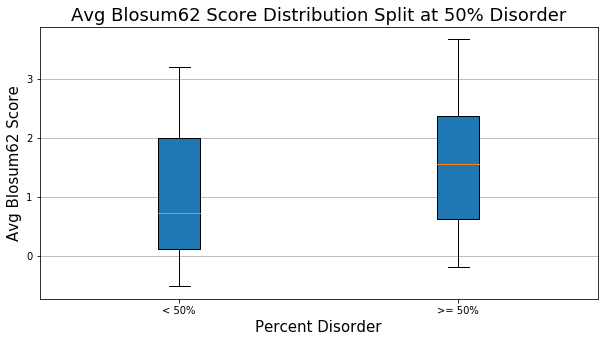

In [15]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Avg Blosum62 Score', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split at 50% Disorder', fontsize=18);

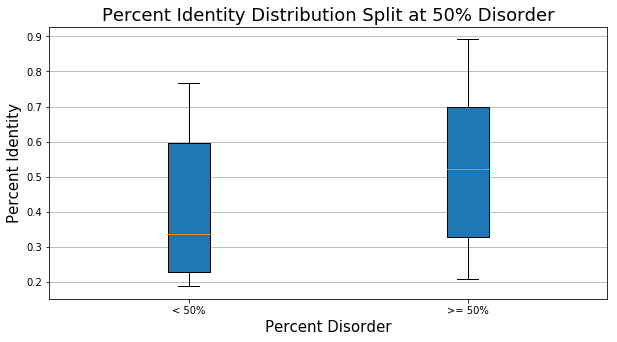

In [16]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Percent Identity', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split at 50% Disorder', fontsize=18);

## Plot Scores with Disorder

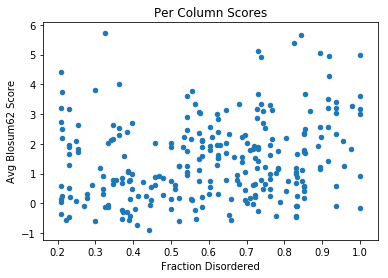

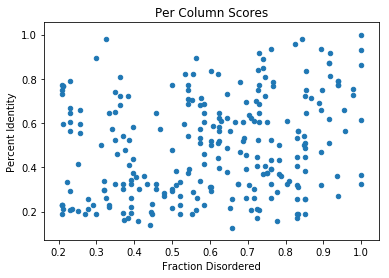

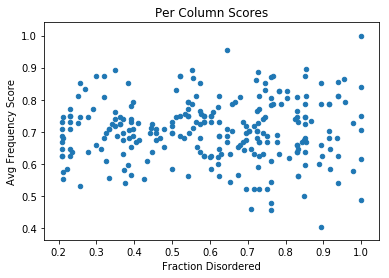

In [17]:
df_clean.plot.scatter('Fraction Disordered', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Avg Frequency Score', title='Per Column Scores');

# Fraction Disorder Filters

In [18]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

22

In [19]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

65

In [20]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

101

In [21]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

73